***Loading the Data***


***Simple Linear Regression***




In [26]:
import pandas as pd
import numpy as np

df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')
df.head(6)

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...
5,14.0 8 454.0 220.0 4354. 9...


***Loading the corect data with headers***

In [27]:
names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'+
                 'auto-mpg/auto-mpg.data',header=None,delim_whitespace=True,names=names,na_values='?')
df.head(6)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


In [28]:
df.shape
(398,6)
df.head(6)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


In [29]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [30]:
df.index

RangeIndex(start=0, stop=398, step=1)

In [31]:
df.values

array([[18.0, 8, 307.0, ..., 70, 1, 'chevrolet chevelle malibu'],
       [15.0, 8, 350.0, ..., 70, 1, 'buick skylark 320'],
       [18.0, 8, 318.0, ..., 70, 1, 'plymouth satellite'],
       ...,
       [32.0, 4, 135.0, ..., 82, 1, 'dodge rampage'],
       [28.0, 4, 120.0, ..., 82, 1, 'ford ranger'],
       [31.0, 4, 119.0, ..., 82, 1, 'chevy s-10']], dtype=object)

In [32]:
df.columns.tolist()

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin',
 'car name']

In [33]:
df2=df['cylinders']
df2.head(6)

0    8
1    8
2    8
3    8
4    8
5    8
Name: cylinders, dtype: int64

In [34]:
df2=df[['cylinders','horsepower']]
df2.head(6)

,cylinders,horsepower
0,8,130.0
1,8,165.0
2,8,150.0
3,8,150.0
4,8,140.0
5,8,198.0


***Plotting Graphs***

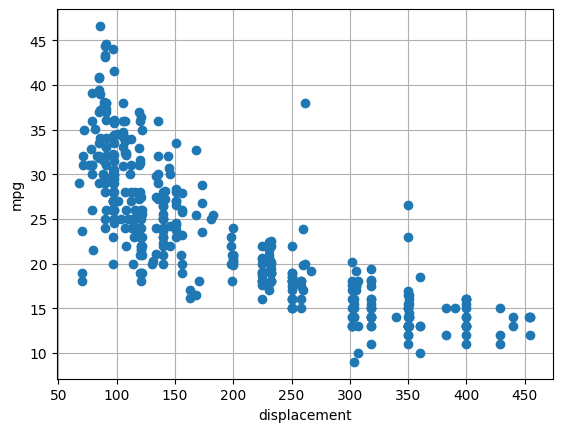

In [35]:
import matplotlib
import matplotlib.pyplot as plt

# Converting the dataframes into numpy arrays

xstr='displacement'
x=np.array(df[xstr])
y=np.array(df['mpg'])



# Create a scatterplot


plt.plot(x,y,'o')
plt.xlabel(xstr)
plt.ylabel('mpg')
plt.grid(True)

***Manipulating Numpy Arrays***

In [36]:
mx=np.mean(x)
my=np.mean(y)
print('Mean{0:5}={1:5.1f},mean mpg={2:5.1f}'.format(xstr,mx,my))

Meandisplacement=193.4,mean mpg= 23.5


***Fraction of cars with > 25 mpg:***


In [37]:
np.mean(y>25)

0.3969849246231156

Mean displacemnt of cars that have mpg >25 .


There are two ways it can be done:


In [38]:
I=(y>25)
np.mean(x*I)/np.mean(I)

110.08227848101266

In [39]:
np.mean(x[I])

110.08227848101266

***Missing Data and NaN values***

In [40]:
xstr='horsepower'
x=np.array(df[xstr])
y=np.array(df['mpg'])
np.mean(x)


nan

Use .dropna()- To remove missing data

In [41]:
df1=df[['mpg','horsepower']]
df2=df1.dropna()
df2.shape

(392, 2)

In [42]:
x=np.array(df2['horsepower'])
y=np.array(df2['mpg'])
np.mean(x)

104.46938775510205

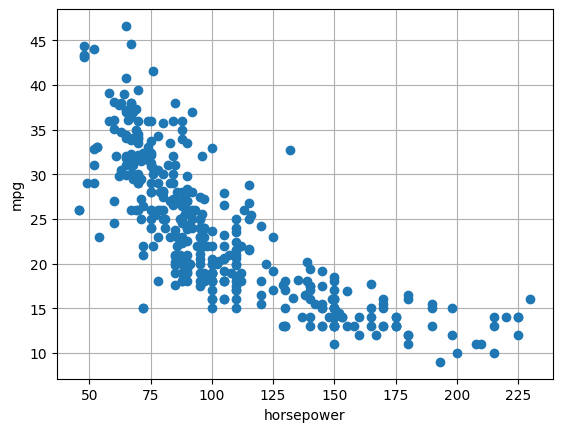

In [43]:
plt.plot(x,y,'o')
plt.xlabel(xstr)
plt.ylabel('mpg')
plt.grid(True)

***Comparing and Plotting a Linear Fit***
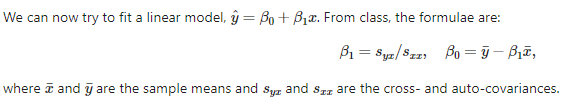

In [44]:
xm=np.mean(x)
ym=np.mean(y)
syy=np.mean((y-ym)**2)
syx=np.mean((y-ym)*(x-xm))
sxx=np.mean((x-xm)**2)
beta1=syx/sxx
beta0=ym-beta1*xm
print("xbar={0:7.2f},ybar={1:7.2f}".format(xm,ym))
print("sqrt(sxx)={0:7.2f},sqrt(syy)={1:7.2f}".format(np.sqrt(sxx),np.sqrt(syy)))
print("beta0={0:7.2f},beat1={1:7.2f}".format(beta0,beta1))



xbar= 104.47,ybar=  23.45
sqrt(sxx)=  38.44,sqrt(syy)=   7.80
beta0=  39.94,beat1=  -0.16


***Points on the regression line***

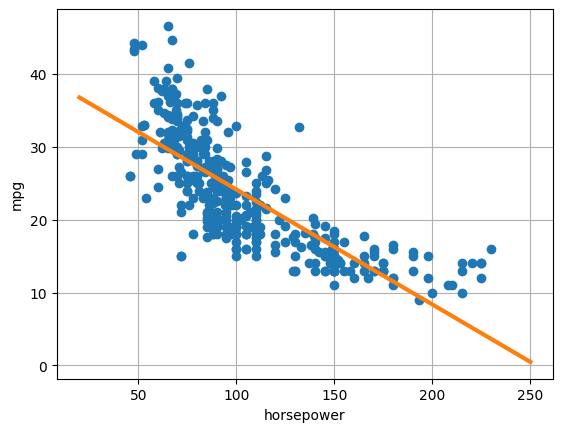

In [45]:
xplt=np.array([20,250])
yplt=beta1*xplt+beta0

plt.plot(x,y,'o')                     # plots the data point
plt.plot(xplt,yplt,'-',linewidth=3)   # plots the regression line
plt.xlabel(xstr)
plt.ylabel('mpg')
plt.grid(True)

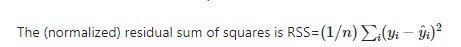

In [46]:
yhat=beta0+beta1*x
RSS=np.mean((y-yhat)**2)
print("RSS={0:7.2f}".format(RSS))


RSS=  23.94


Analytically derived minimum RSS

In [47]:
rxy=syx/np.sqrt(sxx)/np.sqrt(syy)
RSSmin=(1-rxy*rxy)*syy
print("RSSmin={0:7.2f}".format(RSSmin))

RSSmin=  23.94


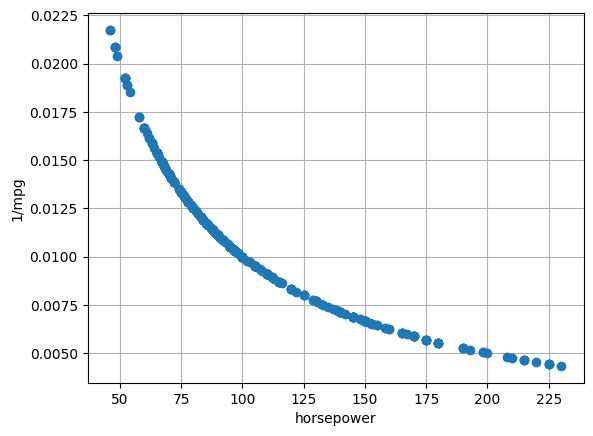

In [48]:
z=1/x
plt.plot(x,z,'o')
plt.xlabel(xstr)
plt.ylabel('1/mpg')
plt.grid(True)

We can create a Linear Regression to fit Z Vs X

In [54]:
xm=np.mean(x)
zm=np.mean(z)
sxz=np.mean((z-zm)*(x-xm))
sxx=np.mean((x-xm)**2)
beta1_inv=sxz/sxx
beta0_inv=zm-beta1_inv*xm

Plotting the scatter plot

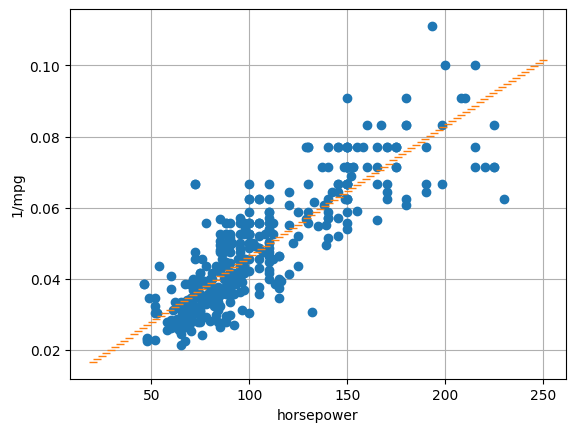

In [56]:
z=1/y
xplt_inv=np.linspace(20,250,100)
zplt_inv=beta1_inv*xplt_inv+beta0_inv
plt.plot(x,z,'o')
plt.plot(xplt_inv,zplt_inv,'_',linewidth=3)
plt.xlabel(xstr)
plt.ylabel('1/mpg')
plt.grid(True)


*The original Linear Fit and Linear Fit with Inversion*


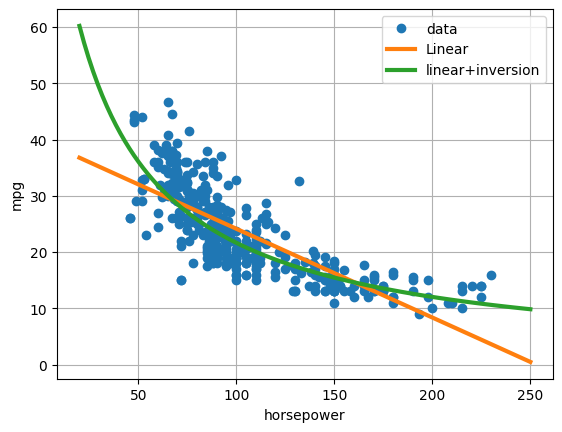

In [59]:
yplt_inv=1/zplt_inv
plt.plot(x,y,'o')
plt.plot(xplt,yplt,'-',linewidth=3)
plt.plot(xplt_inv,yplt_inv,'-',linewidth=3)
plt.xlabel(xstr)
plt.ylabel('mpg')
plt.grid(True)
plt.legend(['data','Linear','linear+inversion'])

***Identifying reduced errors using Non-Linear Transformation***

In [60]:
zhat_inv=beta0_inv+beta1_inv*x
yhat_inv=1/zhat_inv
RSS_inv=np.mean((yhat_inv-y)**2)
print("RSS={0:7.2f}(linear)".format(RSS))
print("RSS={0:7.2f}(linear+inversion)".format(RSS_inv))

RSS=  23.94(linear)
RSS=  20.66(linear+inversion)
